Target:
* Add dropout regularization with a probability of 10% after each layer (except the final layer) to reduce overfitting

Result:
* Max Train accuracy (in 15 epochs): 98.67%.
* Max test accuracy (in 15 epochs): 99%

Analysis:
*  The dropout has reduced the accuracy of both train and test which is expected. However the test accuracy is generally higher than train accuracy.
* I need to boost my trainset by adding data transformations and augmentations. I will include image rotation in the next iteration to try and improve train accuracy

In [2]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull

fatal: destination path 'ERA_V1' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git


Add all the imports

In [3]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_7")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from s7_utils import load_mnist_data, preview_batch_images, plot_statistics
from s7_model import Model_5_Net, model_summary, model_train, model_test

Allocate GPU

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Model_5_Net().to(device)
model_summary(mnist_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]             900
      BatchNorm2d-10           [-1, 10, 22, 22]              20
             ReLU-11           [-1, 10, 22, 22]               0
          Dropout-12           [-1, 10, 22, 22]               0
        MaxPool2d-13           [-1, 10, 11, 11]               0
           Conv2d-14             [-1, 1

Define Transforms - this time add Image rotation

In [5]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation([-15.,15.]),
    transforms.Normalize((0.1307,),(0.3081,))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

Download Data

In [6]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 445947776.94it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42090234.13it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 165380730.70it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22465246.19it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Define train and test loaders

In [7]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

Preview data

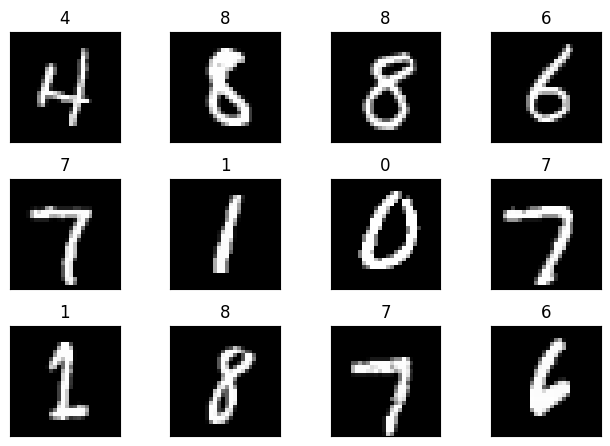

In [8]:
preview_batch_images(train_loader)

In [9]:
model = Model_5_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)


epoch: 1


loss=0.3242631256580353 batch_id=468 Accuracy = 89.04: 100%|██████████| 469/469 [00:17<00:00, 26.15it/s]



Test set: Average loss: 0.1506, Accuracy: 9734/10000 (97.34%)

epoch: 2


loss=0.206016406416893 batch_id=468 Accuracy = 96.75: 100%|██████████| 469/469 [00:16<00:00, 28.14it/s]



Test set: Average loss: 0.0985, Accuracy: 9787/10000 (97.87%)

epoch: 3


loss=0.051847562193870544 batch_id=468 Accuracy = 97.50: 100%|██████████| 469/469 [00:17<00:00, 26.18it/s]



Test set: Average loss: 0.0668, Accuracy: 9838/10000 (98.38%)

epoch: 4


loss=0.06230761483311653 batch_id=468 Accuracy = 97.78: 100%|██████████| 469/469 [00:19<00:00, 24.36it/s]



Test set: Average loss: 0.0600, Accuracy: 9853/10000 (98.53%)

epoch: 5


loss=0.07505855709314346 batch_id=468 Accuracy = 98.02: 100%|██████████| 469/469 [00:16<00:00, 27.89it/s]



Test set: Average loss: 0.0521, Accuracy: 9874/10000 (98.74%)

epoch: 6


loss=0.07538290321826935 batch_id=468 Accuracy = 98.15: 100%|██████████| 469/469 [00:17<00:00, 27.08it/s]



Test set: Average loss: 0.0492, Accuracy: 9861/10000 (98.61%)

epoch: 7


loss=0.07120728492736816 batch_id=468 Accuracy = 98.32: 100%|██████████| 469/469 [00:16<00:00, 27.78it/s]



Test set: Average loss: 0.0419, Accuracy: 9879/10000 (98.79%)

epoch: 8


loss=0.07030873745679855 batch_id=468 Accuracy = 98.33: 100%|██████████| 469/469 [00:18<00:00, 25.25it/s]



Test set: Average loss: 0.0446, Accuracy: 9882/10000 (98.82%)

epoch: 9


loss=0.08325544744729996 batch_id=468 Accuracy = 98.40: 100%|██████████| 469/469 [00:16<00:00, 27.89it/s]



Test set: Average loss: 0.0387, Accuracy: 9895/10000 (98.95%)

epoch: 10


loss=0.06582316756248474 batch_id=468 Accuracy = 98.59: 100%|██████████| 469/469 [00:18<00:00, 25.91it/s]



Test set: Average loss: 0.0401, Accuracy: 9888/10000 (98.88%)

epoch: 11


loss=0.12675099074840546 batch_id=468 Accuracy = 98.44: 100%|██████████| 469/469 [00:16<00:00, 27.85it/s]



Test set: Average loss: 0.0350, Accuracy: 9905/10000 (99.05%)

epoch: 12


loss=0.05542222782969475 batch_id=468 Accuracy = 98.57: 100%|██████████| 469/469 [00:18<00:00, 24.72it/s]



Test set: Average loss: 0.0372, Accuracy: 9896/10000 (98.96%)

epoch: 13


loss=0.048881832510232925 batch_id=468 Accuracy = 98.67: 100%|██████████| 469/469 [00:16<00:00, 27.83it/s]



Test set: Average loss: 0.0357, Accuracy: 9896/10000 (98.96%)

epoch: 14


loss=0.09567660093307495 batch_id=468 Accuracy = 98.67: 100%|██████████| 469/469 [00:17<00:00, 26.98it/s]



Test set: Average loss: 0.0348, Accuracy: 9911/10000 (99.11%)

epoch: 15


loss=0.04846067726612091 batch_id=468 Accuracy = 98.73: 100%|██████████| 469/469 [00:16<00:00, 27.60it/s]



Test set: Average loss: 0.0298, Accuracy: 9913/10000 (99.13%)

epoch: 16


loss=0.04375142976641655 batch_id=468 Accuracy = 98.67: 100%|██████████| 469/469 [00:17<00:00, 26.88it/s]



Test set: Average loss: 0.0291, Accuracy: 9925/10000 (99.25%)

epoch: 17


loss=0.004604557063430548 batch_id=468 Accuracy = 98.79: 100%|██████████| 469/469 [00:17<00:00, 27.23it/s]



Test set: Average loss: 0.0327, Accuracy: 9907/10000 (99.07%)

epoch: 18


loss=0.0782308429479599 batch_id=468 Accuracy = 98.73: 100%|██████████| 469/469 [00:16<00:00, 27.72it/s]



Test set: Average loss: 0.0349, Accuracy: 9899/10000 (98.99%)

epoch: 19


loss=0.08946370333433151 batch_id=468 Accuracy = 98.78: 100%|██████████| 469/469 [00:18<00:00, 25.54it/s]



Test set: Average loss: 0.0270, Accuracy: 9923/10000 (99.23%)



Plot Statistics

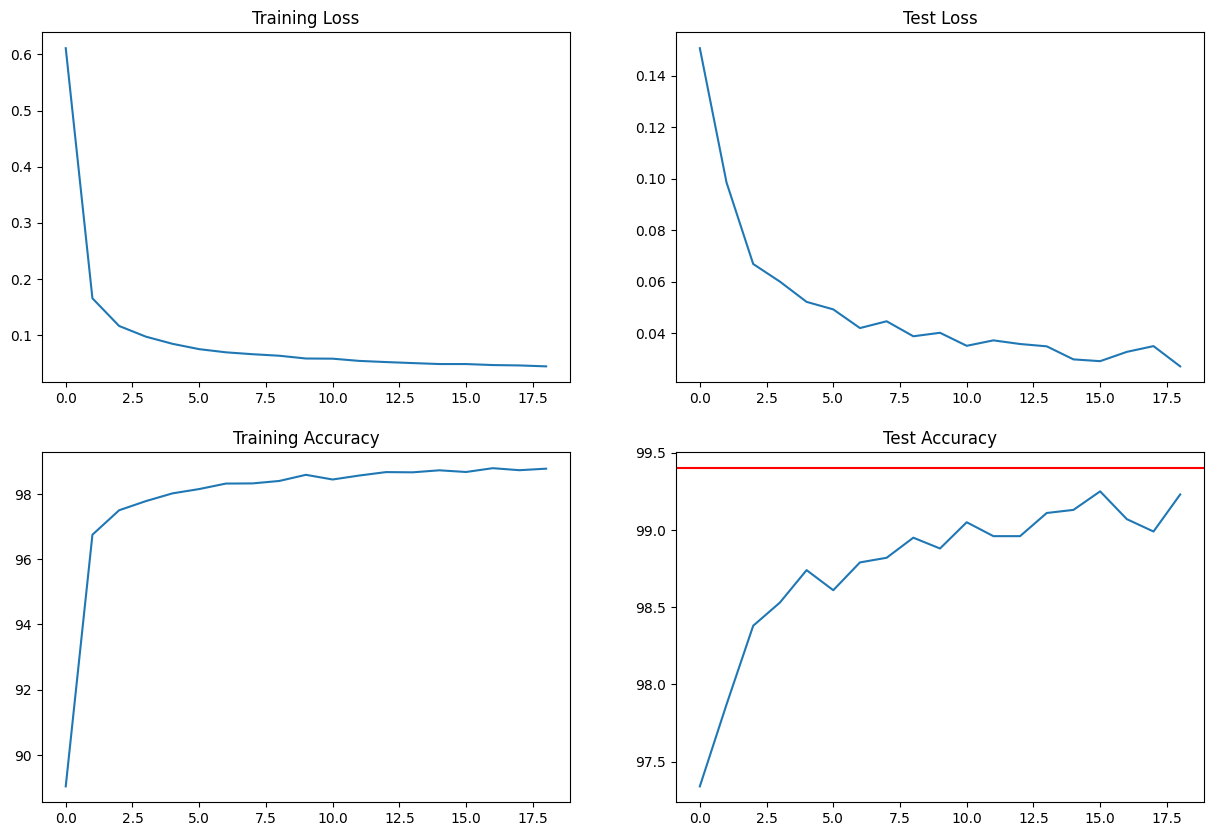

In [10]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)